## 🏠 House Prices -contexto

Este notebook apresenta a avaliação de modelos lineares aplicados ao desafio *House Prices – Advanced Regression Techniques do Kaggle*. O foco aqui é estabelecer uma base sólida de experimentos, utilizando um pré-processador padronizado (`carregado via preprocessador_v0.joblib`) e pipelines consistentes para garantir reprodutibilidade e ausência de data leakage.

A estrutura foi organizada para manter clareza entre carregamento dos dados, preparação das variáveis, construção dos modelos e avaliação dos resultados.

###  Principais Highlights

* **Pré-processamento padronizado:** carregado via `preprocessador_v0.joblib`, garantindo consistência entre notebooks e evitando data leakage.

* **Pipeline único para cada modelo:** integrando automaticamente tratamento de dados e etapa de regressão.

* **Avaliação completa** com:
    * Métricas no conjunto de teste (MAE, RMSE, R²)

    * **Validação cruzada** (K-Fold) com análise da variação entre folds.

* Testes realizados para 5 modelos lineares:

    * Linear Regression

    * Ridge (default e versão ajustada)

    * Lasso (default e versão ajustada)

* Funções auxiliares (`metricas_model()` e `valida()`) padronizam a avaliação e simplificam a comparação entre experimentos.


## 1. Bibliotecas


In [10]:
# =====================================================
# 🏠 House Prices - Modelos Lineares
# =====================================================
import pandas as pd
from pathlib import Path
# Scikit-learn - Modelos lineares
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from setup_notebook import setup_path
setup_path()
from src.model_utils import *
import joblib
import matplotlib.pyplot as plt
import os



## 2. Dataload & preprocessamento

In [11]:
BASE = Path.cwd().parent   
# =====================================================
# ⚙️ 0. carregamento dos preprocessador 
# =====================================================
temp = joblib.load(BASE /'src'/'preprocess_house_prices_v1.joblib')
preprocessador=temp['preprocessador']
colnull_train = temp['colnull_train']

# =====================================================
# 📁 1. Leitura dos dados & Separação das bases
# =====================================================
DATA_DIR = BASE / "data" / "processed"
X_train = pd.read_csv(DATA_DIR / "X_train_final.csv")
X_test  = pd.read_csv(DATA_DIR / "X_test_final.csv")
y_train = pd.read_csv(DATA_DIR / "y_train_final.csv")
y_test  = pd.read_csv(DATA_DIR / "y_test_final.csv")

# =====================================================
#  🤖 3.Definição dos Modelos
# =====================================================
model_lr = LinearRegression()
LR       = pipe_models(model_lr, preprocessador)

model_rd0 = Ridge(alpha=0.01)
RD0       = pipe_models(model_rd0, preprocessador)

model_rd1 = Ridge(alpha=19.30, max_iter=1000, random_state=42, solver='sag',
                 tol=0.001)
RD1       = pipe_models(model_rd1, preprocessador)

model_ls0 = Lasso(alpha=0.01,)
LS0       = pipe_models(model_ls0, preprocessador)

model_ls1 = Lasso(alpha=0.002043, max_iter=2000, tol=0.001)
LS1       = pipe_models(model_ls1, preprocessador)

## 3.Treinamento

In [3]:
# 1. Valida a estabilidade 
r20 = valida(X_train, y_train, model=LR, N=7,write='on')

# 2. Testa a performance 
LR.fit(X_train, y_train)
y_pred0 = LR.predict(X_test)
res0 = metricas_model(y_test, y_pred0, 'Linear Regression',write='on')

validação cruzada (K-Fold Cross Validation)
Fold 1: R² = 0.8194
Fold 2: R² = 0.9047
Fold 3: R² = 0.5328
Fold 4: R² = 0.5714
Fold 5: R² = 0.9001
Fold 6: R² = 0.7101
Fold 7: R² = 0.9156

📊 R² médio: 0.7649 ± 0.1501
🤖 LINEAR REGRESSION
MAE:    0.095
RMSE: 0.1826
R²:   0.8035


In [4]:
# 1. Valida a estabilidade 
r21=valida(X_train,y_train,model=RD0,N=7)

# 2. Testa a performance 
RD0.fit(X_train, y_train)
y_pred1 = RD0.predict(X_test)
res1=metricas_model(y_test, y_pred1, 'Ridge 0')

Validação cruzada realizada!


In [5]:
# 1. Valida a estabilidade 
r22=valida(X_train,y_train,model=RD1,N=7)

# 2. Testa a performance 
RD1.fit(X_train, y_train)
y_pred2 = RD1.predict(X_test)
res2=metricas_model(y_test, y_pred2, 'Ridge 1')

Validação cruzada realizada!


In [6]:
# 1. Valida a estabilidade 
r23=valida(X_train,y_train,model=LS0,N=7)

# 2. Testa a performance 
LS0.fit(X_train, y_train)
y_pred3 = LS0.predict(X_test)
res3=metricas_model(y_test, y_pred3, 'LASSO 0')

Validação cruzada realizada!


In [7]:
# 1. Valida a estabilidade 
r24=valida(X_train,y_train,model=LS1,N=7)

# 2. Testa a performance 
LS1.fit(X_train, y_train)
y_pred4 = LS1.predict(X_test)
res4=metricas_model(y_test, y_pred4, 'LASSO 1')

Validação cruzada realizada!


,Modelo,MAE,RMSE,R²
0,Linear Regression,0.0950,0.1826,0.8035
1,Ridge 0,0.0945,0.1679,0.8337
2,Ridge 1,0.0963,0.1346,0.8932
3,LASSO 0,0.1089,0.1508,0.8660
4,LASSO 1,0.0994,0.1384,0.8871


,Modelo,R2_Médio,R2_Std
0,r20,0.764870,0.150144
1,r21,0.784045,0.129440
2,r22,0.844976,0.090378
3,r23,0.820092,0.091839
4,r24,0.836940,0.094300


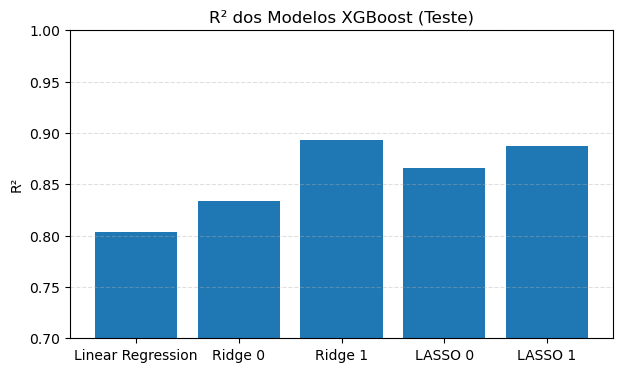

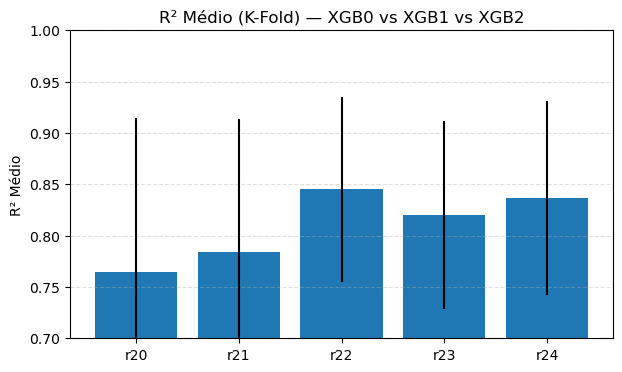

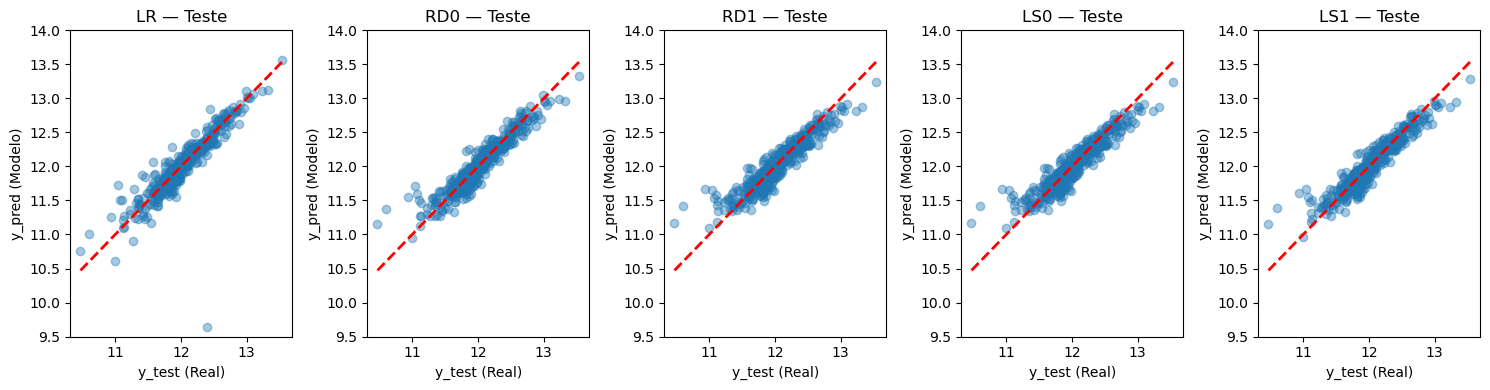

In [8]:
import matplotlib.pyplot as plt

# =====================================================
# 1. Organizar resultados em DataFrame
# =====================================================

resultados_teste = pd.DataFrame([
    res0, res1,res2,res3,res4])

resultados_cv = pd.DataFrame({
    "Modelo": ["r20", "r21","r22","r23","r24"],
    "R2_Médio": [np.mean(r20), np.mean(r21),np.mean(r22),np.mean(r23),np.mean(r24)],
    "R2_Std":   [np.std(r20),np.std(r21),np.std(r22),np.std(r23),  np.std(r24)]
})

display(resultados_teste)
display(resultados_cv)

# =====================================================
# 2. Gráfico — R² no conjunto de teste
# =====================================================

plt.figure(figsize=(7,4))
plt.bar(resultados_teste['Modelo'], resultados_teste['R²'])
plt.title("R² dos Modelos XGBoost (Teste)")
plt.ylabel("R²")
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# =====================================================
# 3. Gráfico — R² médio da validação cruzada
# =====================================================

plt.figure(figsize=(7,4))
plt.bar(resultados_cv['Modelo'], resultados_cv['R2_Médio'], yerr=resultados_cv['R2_Std'])
plt.title("R² Médio (K-Fold) — XGB0 vs XGB1 vs XGB2")
plt.ylabel("R² Médio")
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# =====================================================
# 4. Gráfico de Dispersão — y_test vs y_pred para cada modelo
# =====================================================
a=LR.predict(X_test)
predicoes = {
    "LR":  y_pred0,
    "RD0": y_pred2,
    "RD1":y_pred3,
    "LS0": y_pred3,
    "LS1": y_pred4
}

plt.figure(figsize=(15,4))



for i, (nome, y_p) in enumerate(predicoes.items(), 1):
    plt.subplot(1, 5, i)
    plt.scatter(y_test, y_p, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2)
    plt.ylim([9.5,14])
    plt.title(f"{nome} — Teste")
    plt.xlabel("y_test (Real)")
    plt.ylabel("y_pred (Modelo)")

plt.tight_layout()
plt.show()